In [1]:
import numpy as np
import pandas as pd

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc
from sklearn import metrics
import os

In [2]:
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
#check of missing values
print(df.shape)
df.info()

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol',
                    'fbs':'Fasting_blood_sugar','restecg':'Resting_ECG_results','thalach':'Max_heart_rate',
                    'exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope',
                    'ca':'Major_vessels','thal':'Thalassemia_types','target':'Heart_disease'},inplace = True)
df.head(10)

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,Resting_ECG_results,Max_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
df = df.drop(labels=[49,93,159,164,165,252,282], axis=0)#drop wrong Major_vessels and Thalassemia_types values
print(f'The length of the data now is {len(df)} instead of 303')
df.shape

The length of the data now is 296 instead of 303


(296, 14)

1    161
0    135
Name: Heart_disease, dtype: int64


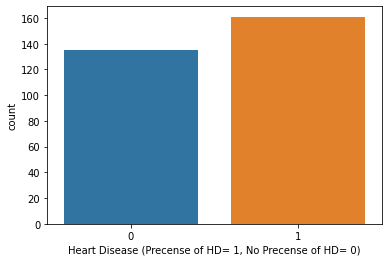

In [5]:
print(df.Heart_disease.value_counts())
sns.countplot(x="Heart_disease", data=df)
plt.xlabel("Heart Disease (Precense of HD= 1, No Precense of HD= 0)")
plt.show()

In [7]:
countSick= len(df[df.Heart_disease==1])
countNotSick= len(df[df.Heart_disease==0])
print("Percentage of patients with presence of heart disease: {:.2f}%".format((countSick/ (len(df.Heart_disease))*100)))
print("Percentage of patients with no presence of heart disease: {:.2f}%".format((countNotSick/ (len(df.Heart_disease))*100)))

Percentage of patients with presence of heart disease: 54.39%
Percentage of patients with no presence of heart disease: 45.61%


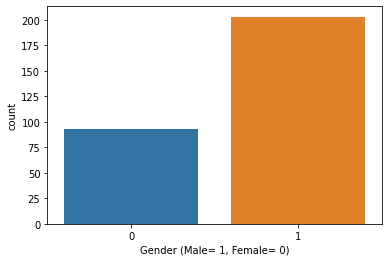

In [8]:
sns.countplot(x="Sex", data=df)
plt.xlabel("Gender (Male= 1, Female= 0)")
plt.show()

In [9]:
countMen= len(df[df.Sex==1])
countWomen= len(df[df.Sex==0])
print("Male Percentage: {:.2f}%".format((countMen/ (len(df.Sex))*100)))
print("Female Percentage: {:.2f}%".format((countWomen/ (len(df.Sex))*100)))

Male Percentage: 68.58%
Female Percentage: 31.42%


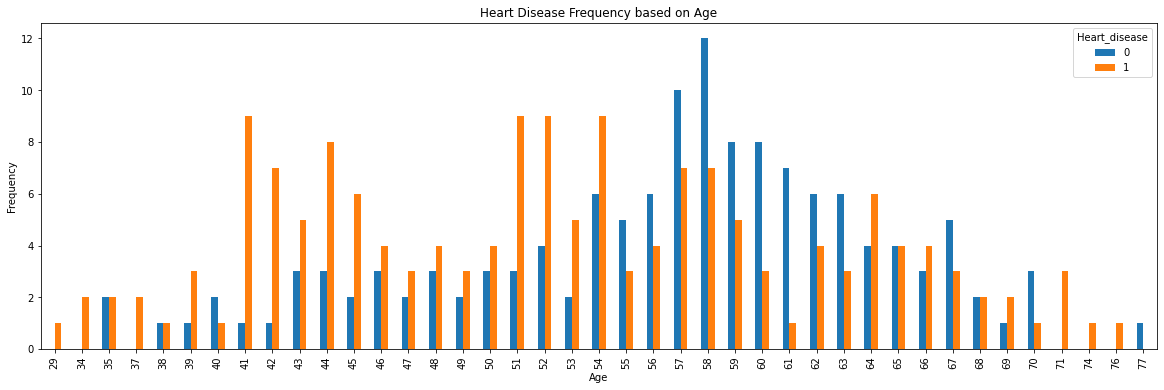

In [6]:
pd.crosstab(df.Age,df.Heart_disease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency based on Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

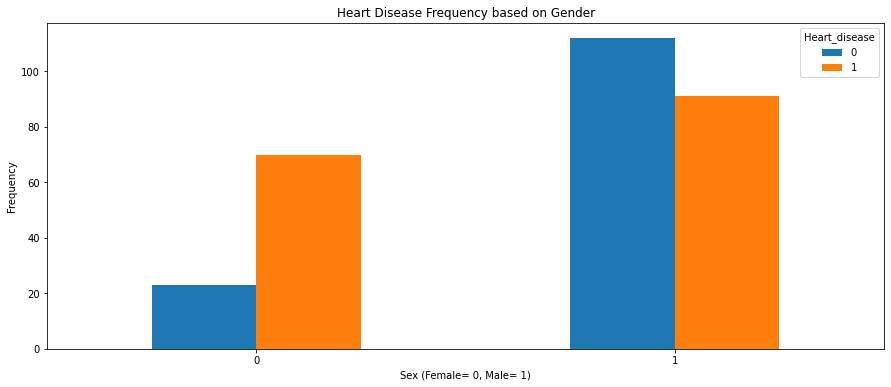

In [7]:
pd.crosstab(df.Sex,df.Heart_disease).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency based on Gender')
plt.xlabel('Sex (Female= 0, Male= 1)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

In [8]:
g= df.groupby(['Sex','Age'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(15).style.background_gradient()

,Sex,Age,Heart_disease
59,1,58,13
58,1,57,13
60,1,59,12
53,1,52,12
55,1,54,11
45,1,44,9
52,1,51,8
65,1,64,7
57,1,56,7
61,1,60,7


In [9]:
g= df.groupby(['Sex','Chest_pain'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(8).style.background_gradient()

,Sex,Chest_pain,Heart_disease
4,1,0,103
6,1,2,50
0,0,0,37
2,0,2,35
5,1,1,31
7,1,3,19
1,0,1,17
3,0,3,4


In [14]:
g= df.groupby(['Sex','Resting_blood_pressure'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(10).style.background_gradient()

,Sex,Resting_blood_pressure,Heart_disease
46,1,120,27
54,1,130,23
60,1,140,22
40,1,110,16
15,0,130,12
50,1,125,11
10,0,120,10
21,0,140,10
66,1,150,10
52,1,128,9


In [15]:
g= df.groupby(['Sex','Cholesterol'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(10).style.background_gradient()

,Sex,Cholesterol,Heart_disease
115,1,212,5
172,1,282,4
109,1,204,4
135,1,234,4
134,1,233,4
48,0,269,4
150,1,254,4
132,1,231,3
140,1,240,3
139,1,239,3


In [16]:
g= df.groupby(['Sex','Fasting_blood_sugar'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(4).style.background_gradient()

,Sex,Fasting_blood_sugar,Heart_disease
2,1,0,171
0,0,0,83
3,1,1,32
1,0,1,10


In [17]:
g= df.groupby(['Sex','Resting_ECG_results'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease')
g.head(6).style.background_gradient()

,Sex,Resting_ECG_results,Heart_disease
5,1,2,1
2,0,2,3
0,0,0,42
1,0,1,48
3,1,0,101
4,1,1,101


In [18]:
g= df.groupby(['Sex','Max_heart_rate'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(10).style.background_gradient()

,Sex,Max_heart_rate,Heart_disease
101,1,162,7
84,1,144,7
76,1,132,7
80,1,140,6
95,1,156,6
69,1,125,6
89,1,150,6
41,0,172,6
111,1,173,6
87,1,147,5


In [19]:
g= df.groupby(['Sex','Exercise_induced_angina'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(4).style.background_gradient()

,Sex,Exercise_induced_angina,Heart_disease
2,1,0,127
3,1,1,76
0,0,0,72
1,0,1,21


In [20]:
g= df.groupby(['Sex','ST_depression'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(10).style.background_gradient()

,Sex,ST_depression,Heart_disease
27,1,0.000000,62
0,0,0.000000,33
37,1,1.200000,13
34,1,0.800000,10
36,1,1.000000,9
41,1,1.800000,8
38,1,1.400000,8
33,1,0.600000,8
43,1,2.000000,7
40,1,1.600000,7


In [21]:
g= df.groupby(['Sex','ST_slope'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(6).style.background_gradient()

,Sex,ST_slope,Heart_disease
5,1,2,94
4,1,1,93
1,0,1,44
2,0,2,44
3,1,0,16
0,0,0,5


In [22]:
g= df.groupby(['Sex','Major_vessels'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(10).style.background_gradient()

,Sex,Major_vessels,Heart_disease
4,1,0,110
0,0,0,63
5,1,1,49
6,1,2,25
7,1,3,15
1,0,1,14
2,0,2,13
8,1,4,4
3,0,3,3


In [23]:
g= df.groupby(['Sex','Thalassemia_types'])['Heart_disease'].count().reset_index().sort_values(by='Heart_disease',ascending=False)
g.head(8).style.background_gradient()

,Sex,Thalassemia_types,Heart_disease
7,1,3,101
6,1,2,85
2,0,2,76
5,1,1,16
3,0,3,15
0,0,0,1
1,0,1,1
4,1,0,1


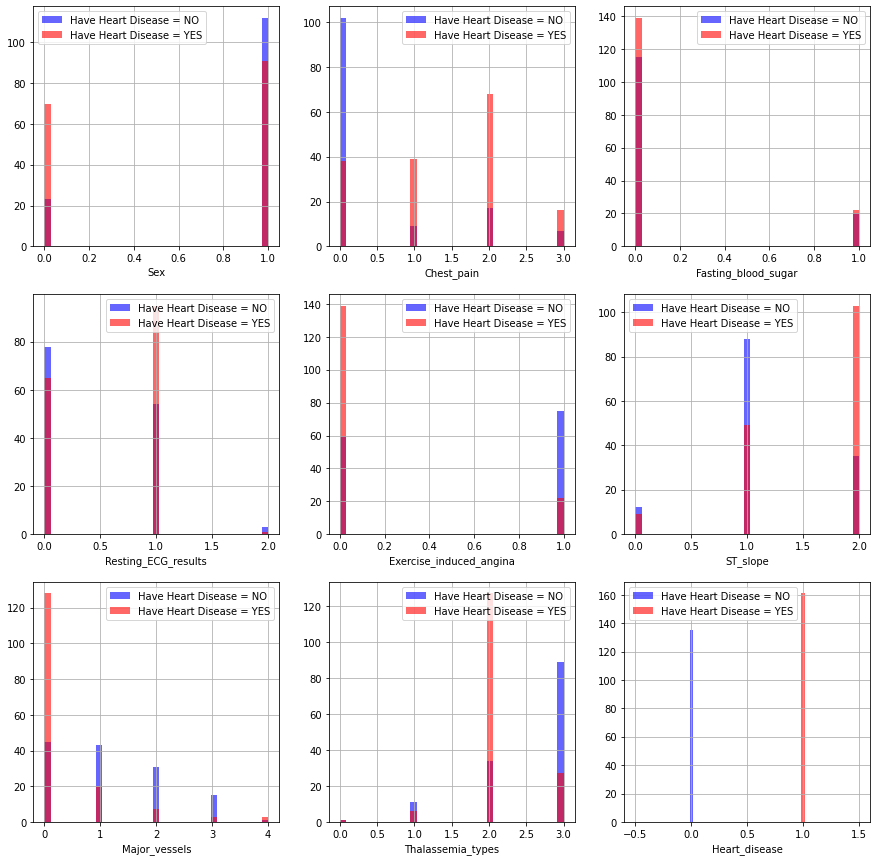

In [10]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["Heart_disease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["Heart_disease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

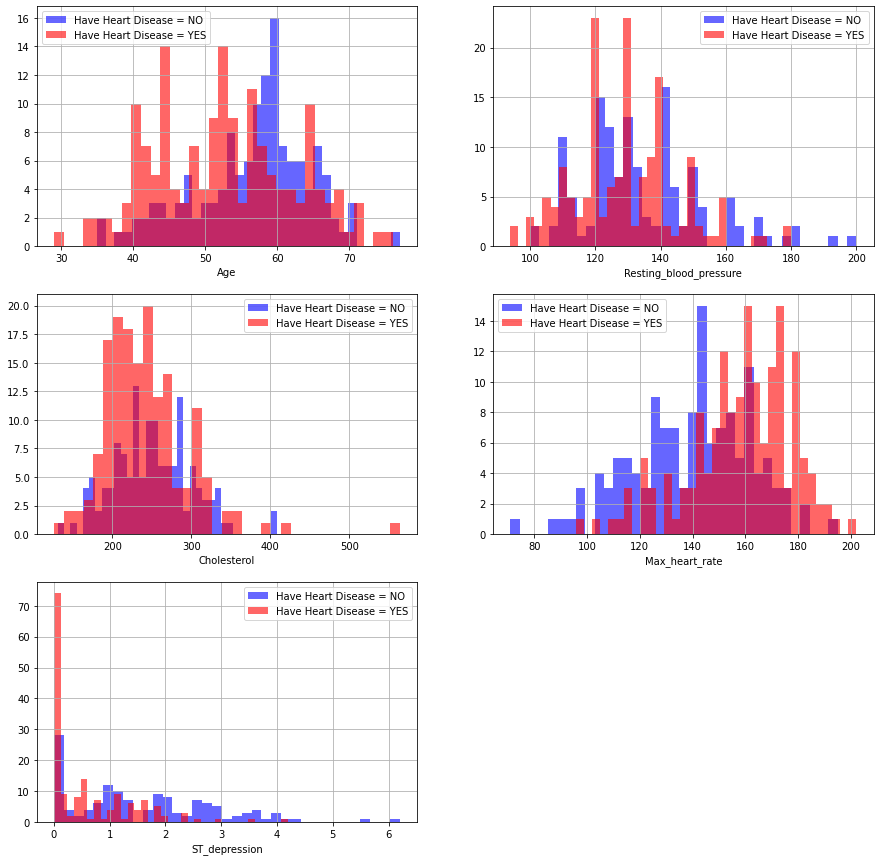

In [11]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["Heart_disease"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["Heart_disease"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

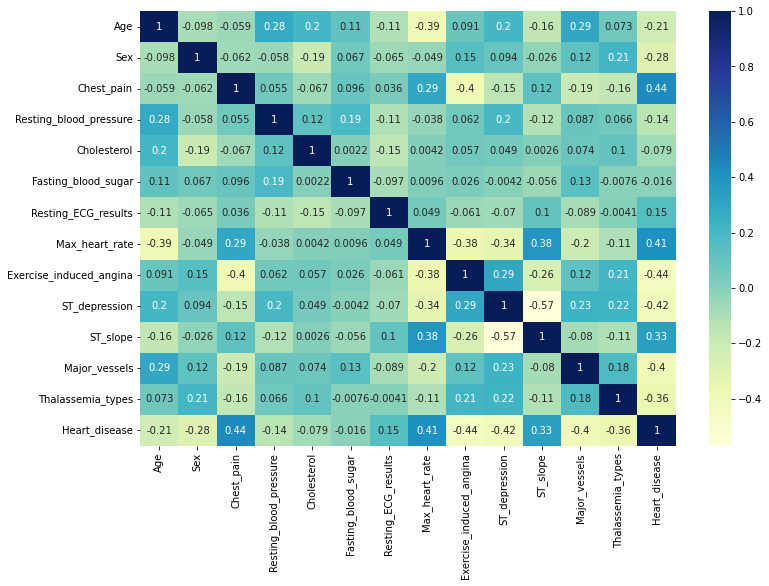

In [12]:
#correlation
cor = df.corr()
plt.figure(figsize= (12,8))
sns.heatmap(cor, cmap = 'YlGnBu', annot = True)
plt.show()


In [13]:
dummy1 = pd.get_dummies(df.Chest_pain)
dummy2 = pd.get_dummies(df.Resting_ECG_results)
dummy3 = pd.get_dummies(df.ST_slope)
dummy4 = pd.get_dummies(df.Major_vessels)
dummy5 = pd.get_dummies(df.Thalassemia_types)
merge = pd.concat([df,dummy1,dummy2,dummy3,dummy4,dummy5],axis = 'columns')
fdf = merge.drop(['Chest_pain','Resting_ECG_results','ST_slope','Major_vessels','Thalassemia_types'],axis = 1)
fdf.head()

,Age,Sex,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,Max_heart_rate,Exercise_induced_angina,ST_depression,Heart_disease,0,...,2,0,1,2,3,4,0,1,2,3
0,63,1,145,233,1,150,0,2.3,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,1,0,...,1,1,0,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,0,120,354,0,163,1,0.6,1,1,...,1,1,0,0,0,0,0,0,1,0


In [14]:
y = fdf["Heart_disease"]
X = fdf.drop('Heart_disease',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
print(Counter(y_train))

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.values)
X_test = scaler.transform(X_test.values)

Counter({1: 129, 0: 107})


In [49]:
#Logistic Regression
Log = LogisticRegression()

parameters_log = {'C': [0.01, 0.1, 0.2, 0.5, 2, 5, 10]}

log_reg = GridSearchCV(Log, parameters_log, scoring='neg_mean_squared_error' ,cv =5)
log_reg.fit(X_train, y_train)
print(log_reg.best_params_)

model = LogisticRegression(C=0.5)
model.fit(X_train,y_train)
accuracy_test = model.score(X_test,y_test)
accuracy_train = model.score(X_train,y_train)
print('Logistic Regression Train Accuracy: {:.2f}%'.format((accuracy_train)*100))
pred_train=model.predict(X_train)
log_train_matrix=confusion_matrix(y_train,pred_train)
print("Confusion Matrix")
print(log_train_matrix)
print(classification_report(y_train,pred_train))

print('Logistic Regression Test Accuracy: {:.2f}%'.format((accuracy_test)*100))
pred = model.predict(X_test)
pred_prob=model.predict_proba(X_test)
log_matrix = confusion_matrix(y_test,pred)
print("Confusion Matrix")
print(log_matrix)
print(classification_report(y_test,pred))

{'C': 0.5}
Logistic Regression Train Accuracy: 85.59%
Confusion Matrix
[[ 90  17]
 [ 17 112]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       107
           1       0.87      0.87      0.87       129

    accuracy                           0.86       236
   macro avg       0.85      0.85      0.85       236
weighted avg       0.86      0.86      0.86       236

Logistic Regression Test Accuracy: 86.67%
Confusion Matrix
[[24  4]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        32

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



kNN Test Accuracy: 88.33%


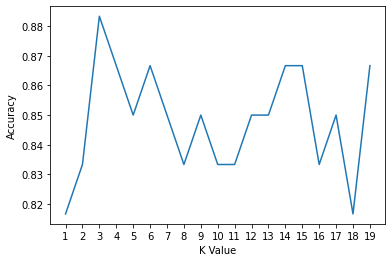

In [16]:
#kNN
K_range = range(1,20)
scores = {}
scorekNN = []
for i in K_range:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[K_range] = metrics.accuracy_score(y_test,y_pred)
    scorekNN.append(metrics.accuracy_score(y_test,y_pred))
    
plt.plot(K_range,scorekNN)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K Value")
plt.ylabel("Accuracy")
print("kNN Test Accuracy: {:.2f}%".format((max(scorekNN))*100))

In [48]:
model2 = KNeighborsClassifier(n_neighbors = 3)
model2.fit(X_train,y_train)
pred_train2=model2.predict(X_train)
y_pred = model2.predict(X_test)
pred_prob2=model2.predict_proba(X_test)
knn_matrix= confusion_matrix(y_test,y_pred)
knn_train_matrix= confusion_matrix(y_train,pred_train2)
accuracy_train2=model2.score(X_train,y_train)
accuracy_test2=model2.score(X_test,y_test)
print("kNN Train Accuracy: {:.2f}%".format((accuracy_train2)*100))
print("Confusion Matrx")
print(knn_train_matrix)
print(classification_report(y_train,pred_train2))

print("kNN Test Accuracy: {:.2f}%".format((accuracy_test2)*100))
print("Confusion Matrx")
print(knn_matrix)
print(classification_report(y_test,y_pred))

kNN Train Accuracy: 88.56%
Confusion Matrx
[[ 90  17]
 [ 10 119]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       107
           1       0.88      0.92      0.90       129

    accuracy                           0.89       236
   macro avg       0.89      0.88      0.88       236
weighted avg       0.89      0.89      0.89       236

kNN Test Accuracy: 88.33%
Confusion Matrx
[[25  3]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        28
           1       0.90      0.88      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [46]:
#SVM
C = [0.01,0.1,0.5,1,5,10]
kernel= ['linear', 'poly', 'rbf', 'sigmoid']

svm = SVC()

svm_parameters = {'C': [.01,.1,.5,1,5,10],'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svm = GridSearchCV(svm, svm_parameters, scoring='neg_mean_squared_error' ,cv =5)
svm.fit(X_train, y_train)
svm.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [50]:
model3 = SVC(C=0.1,kernel='poly',degree=5,probability=True)
model3.fit(X_train,y_train)
accuracy_train3=model3.score(X_train,y_train)
accuracy_test3=model3.score(X_test,y_test)
pred_train3=model3.predict(X_train)
pred3 = model3.predict(X_test)
pred_prob3=model3.predict_proba(X_test)

print("SVM Classifier Train Accuracy: {:.2f}%".format((accuracy_train3)*100))
svm_train_matrix=confusion_matrix(y_train,pred_train3)
print("Confusion Matrx")
print(svm_train_matrix)
print(classification_report(y_train,pred_train3))


print("SVM Classifier Test Accuracy: {:.2f}%".format((accuracy_test3)*100))
svm_matrix= confusion_matrix(y_test,pred3)
print("Confusion Matrx")
print(svm_matrix)
print(classification_report(y_test,pred3))

SVM Classifier Train Accuracy: 91.53%
Confusion Matrx
[[ 94  13]
 [  7 122]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       107
           1       0.90      0.95      0.92       129

    accuracy                           0.92       236
   macro avg       0.92      0.91      0.91       236
weighted avg       0.92      0.92      0.91       236

SVM Classifier Test Accuracy: 86.67%
Confusion Matrx
[[24  4]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        32

    accuracy                           0.87        60
   macro avg       0.87      0.87      0.87        60
weighted avg       0.87      0.87      0.87        60



In [20]:
#Decision Trees
criterion = ['gini','entropy']
max_depth= [2,4,6,8,10,12]
min_samples_split= [2,3,4]
min_samples_leaf= [1,2]

tree = DecisionTreeClassifier()

tree_parameters = {'criterion': ['gini','entropy'],'max_depth': [2,4,6,8,10,12],'min_samples_split': [2,3,4],
                   'min_samples_leaf': [1,2]}

tree_classifier = GridSearchCV(tree, tree_parameters, scoring='neg_mean_squared_error' ,cv =5)
tree_classifier.fit(X_train, y_train)
tree_classifier.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [44]:
model4 = DecisionTreeClassifier(random_state=42,criterion = 'gini',max_depth=4,min_samples_leaf=2
                                ,min_samples_split=4)
model4.fit(X_train,y_train)
accuracy_train4 = model4.score(X_train,y_train)
accuracy_test4 = model4.score(X_test,y_test)
pred_train4= model4.predict(X_train)
pred4 = model4.predict(X_test)
pred_prob4=model4.predict_proba(X_test)

print('Decision Tree Train Accuracy: {:.2f}%'.format((accuracy_train4)*100))
tree_train_matrix=confusion_matrix(y_train,pred_train4)
print("Confusion Matrx")
print(tree_train_matrix)
print(classification_report(y_train,pred_train4))

print('Decision Tree Test Accuracy: {:.2f}%'.format((accuracy_test4)*100))
tree_matrix= confusion_matrix(y_test,pred4)
print("Confusion Matrx")
print(tree_matrix)
print(classification_report(y_test,pred4))

Decision Tree Train Accuracy: 87.71%
Confusion Matrx
[[ 94  13]
 [ 16 113]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       107
           1       0.90      0.88      0.89       129

    accuracy                           0.88       236
   macro avg       0.88      0.88      0.88       236
weighted avg       0.88      0.88      0.88       236

Decision Tree Test Accuracy: 80.00%
Confusion Matrx
[[24  4]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80        28
           1       0.86      0.75      0.80        32

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.81      0.80      0.80        60



In [ ]:
#Random Forest
n_estimators = [15,50,100,150,250,500]
criterion = ['gini','entropy']
max_features = ['auto','sqrt','log2']
max_depth= [2,4,6,8,10,12]
min_samples_split= [2,3,4]
min_samples_leaf= [1,2]

rf = RandomForestClassifier()

rf_parameters = {'n_estimators': [15,50,100,150,250],'criterion': ['gini','entropy'],
                 'max_features':['auto','sqrt','log2'],'max_depth': [2,4,6,8,10,12],'min_samples_split': [2,3,4],
                   'min_samples_leaf': [1,2]}

rf_Classifier = GridSearchCV(rf, rf_parameters, scoring='neg_mean_squared_error' ,cv =5)
rf_Classifier.fit(X_train, y_train)
rf_Classifier.best_params_

In [43]:
model5 = RandomForestClassifier(criterion = 'entropy',max_features = 'auto',n_estimators = 15, random_state = 42)
model5.fit(X_train,y_train)
accuracy_train5 = model5.score(X_train,y_train)
accuracy_test5 = model5.score(X_test,y_test)
pred_train5 = model5.predict(X_train)
pred5 = model5.predict(X_test)
pred_prob5=model5.predict_proba(X_test)

print('Random Forest Classifier Train Accuracy: {:.2f}%'.format((accuracy_train5)*100))
rf_train_matrix=confusion_matrix(y_train,pred_train5)
print("Confusion Matrx")
print(rf_train_matrix)
print(classification_report(y_train,pred_train5))



print('Random Forest Classifier Test Accuracy: {:.2f}%'.format((accuracy_test5)*100))
rf_matrix= confusion_matrix(y_test,pred5)
print("Confusion Matrx")
print(rf_matrix)
print(classification_report(y_test,pred5))

Random Forest Classifier Train Accuracy: 99.58%
Confusion Matrx
[[107   0]
 [  1 128]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       107
           1       1.00      0.99      1.00       129

    accuracy                           1.00       236
   macro avg       1.00      1.00      1.00       236
weighted avg       1.00      1.00      1.00       236

Random Forest Classifier Test Accuracy: 88.33%
Confusion Matrx
[[24  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.88      0.91      0.89        32

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [23]:
compare = pd.DataFrame({'Model': ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest"], 
                        'Test_Accuracy': [86.67, 88.33, 86.67, 80.00, 88.33]})
compare.sort_values(by='Test_Accuracy', ascending=False)

,Model,Test_Accuracy
1,KNN,88.33
4,Random Forest,88.33
0,Logistic Regression,86.67
2,SVM,86.67
3,Decision Tree,80.00


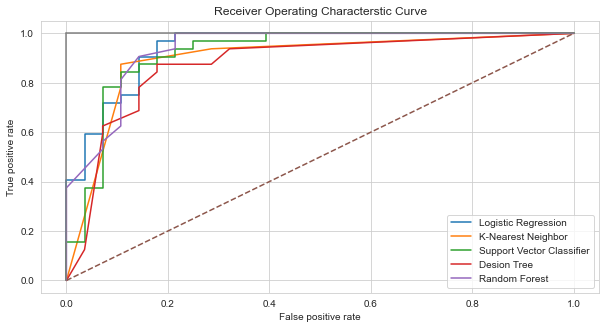

In [62]:
lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,pred_prob[:,1])                                                            
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,pred_prob2[:,1])
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,pred_prob3[:,1])
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,pred_prob4[:,1])
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,pred_prob5[:,1]) 

sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Receiver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

In [58]:
print("AUC Scores")
print("LR:",auc(lr_false_positive_rate,lr_true_positive_rate))
print("kNN:",auc(knn_false_positive_rate,knn_true_positive_rate))
print("SVC:",auc(svc_false_positive_rate,svc_true_positive_rate))
print("DT:",auc(dt_false_positive_rate,dt_true_positive_rate))
print("RF:",auc(rf_false_positive_rate,rf_true_positive_rate))

AUC Scores
LR: 0.9408482142857142
kNN: 0.8956473214285714
SVC: 0.9196428571428572
DT: 0.8744419642857144
RF: 0.9358258928571429
